# Worksheet 12

Name:  Esther Choi 
UID: U24585295

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. Classification
2. No
3. Classification
4. No


b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Utilize a training and testing set. Use the training set to train your model by choosing a
combination of features that best generalizes the trend of the dataset without
underfitting or overfitting. Then test it on the testing set. The model should generalize
both sets well without being too specific to the training set or being too simple that it
generalizes any trend.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

underfitting: over-generalization of data because the model is too simple.

overfitting: learning something that is too specific to data that we collected, there
could be bias.

### K Nearest Neighbors

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

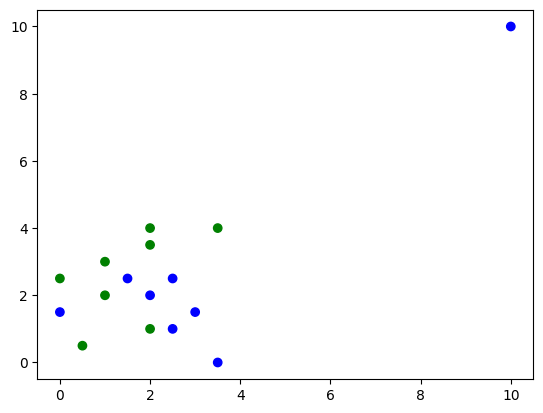

In [9]:

colors = np.array([x for x in 'bgrcmyk'])
x_coordinates, y_coordinates = data["Attribute A"], data["Attribute B"]
color_coordinates = colors[data["Class"]].tolist()
plt.scatter(x_coordinates, y_coordinates, color=color_coordinates)
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

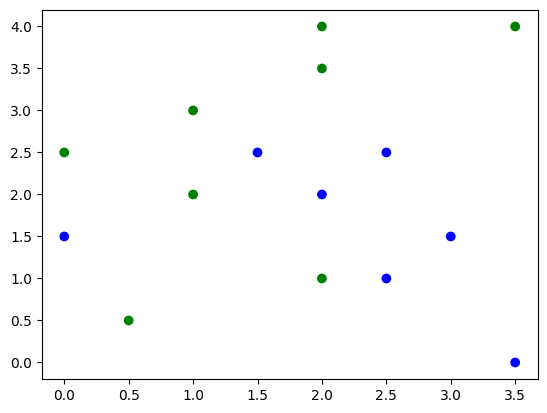

In [13]:
x_no_outlier = (data["Attribute A"])[:-1]
y_no_outlier = (data["Attribute B"])[:-1]
color_no_outlier = (data["Class"])[:-1]
plt.scatter(x_no_outlier, y_no_outlier, color=colors[color_no_outlier].tolist())
plt.show()

Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Yes, the point at (0,3.5) could be considered a noise point because it doesn't follow the
general linear trend

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

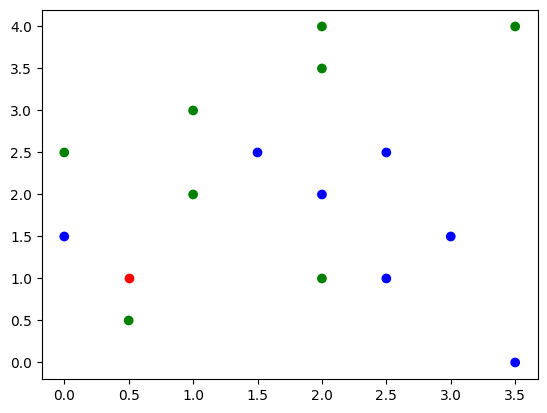

In [15]:
x,y = 0.5, 1
specific_point_color = 'red'
plt.scatter(x_no_outlier, y_no_outlier, color=colors[color_no_outlier].tolist())
plt.scatter(x, y, color=specific_point_color, label='Specific Point')
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

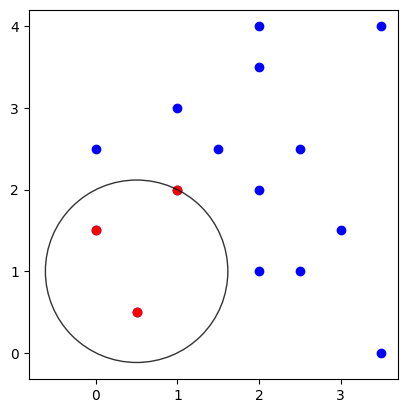

In [29]:
# gets the closest n points to example using data
def n_closest_to(example, n, data):
    dataset_x, dataset_y = data
    x,y = example
    distances = np.sqrt((dataset_x - x)**2 + (dataset_y - y)**2)
    closest_indices = np.argsort(distances)[:n]
    closest_distances = np.array([distances[i] for i in closest_indices])
    return closest_distances, closest_indices
    
# call the function n_closest_to
dataset_x, dataset_y = np.array(x_no_outlier), np.array(y_no_outlier)
closest_distances, closest_indices = n_closest_to((x,y), 3, (dataset_x, dataset_y))

# plot the circle and points in relation to its radius
location = ( x , y )
radius = max(closest_distances)
_, axes = plt.subplots()
axes.scatter(dataset_x, dataset_y, color='blue', label='Data Points')
axes.scatter(dataset_x[closest_indices], dataset_y[closest_indices], color='red')
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [30]:
def majority(points):
    closest_classes = [data["Class"][i] for i in points]
    class_counts = {0: 0, 1: 0}
    for label in closest_classes:
        class_counts[label] += 1
        majority_class = max(class_counts, key=class_counts.get)
    return majority_class


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [35]:
count = 0
for i in range(len(dataset_x)):
    actual_class = data["Class"][i]
    test_point = (dataset_x[i], dataset_y[i])
    
    training_x = x_no_outlier[:i] + x_no_outlier[i+1:]
    training_y = y_no_outlier[:i] + y_no_outlier[i+1:]
    
    training_set = (training_x, training_y)
    
    closest_distances, closest_indices = n_closest_to(test_point, 3, training_set)
    prediction = majority(closest_indices)
    if prediction == actual_class:
        count += 1
print("overall accuracy = ", count/len(dataset_x))

overall accuracy =  0.6


## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Create training and testing datasets with an 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Create a random sample of the training dataset
sample_size = 500  # Adjust this as needed based on your computational capacity
random_indices = np.random.choice(X_train.shape[0], sample_size, replace=False)
X_train_sample = X_train[random_indices]
y_train_sample = y_train[random_indices]

# Split the testing dataset as before
X_test, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# Initialize lists to store training and testing accuracy
train_accuracy = []
test_accuracy = []

# Iterate through values of K from 1 to 20
for k in range(1, 21):
    # Train a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predictions on training and testing data
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    # Calculate training and testing accuracy
    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    
    # Append accuracy scores to the lists
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Plotting the graph
plt.plot(range(1, 21), train_accuracy, label='Training Accuracy')
plt.plot(range(1, 21), test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs. Number of Neighbors')
plt.legend()
plt.show()

# Finding the optimal value of K
optimal_k = np.argmax(test_accuracy) + 1
print("Optimal value of K:", optimal_k)


KeyboardInterrupt: 

Optimal value of K is 

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(dimensionality_reduction, knn_model)
model.fit(...)

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below

In [10]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [138]:
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

In [139]:
#add 2 new features

# Family size
train_data['Family_Size'] = train_data['SibSp'] + train_data['Parch']
test_data['Family_Size'] = test_data['SibSp'] + test_data['Parch']

# Age group
age_bins = [0, 12, 18, 30, 60, 100]  # Define age bins
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Elderly']
train_data['AgeGroup'] = pd.cut(train_data['Age'], bins=age_bins, labels=age_labels, right=False)
test_data['AgeGroup'] = pd.cut(test_data['Age'], bins=age_bins, labels=age_labels, right=False)

In [142]:
# Preprocess
train_data['AgeGroup'].fillna(train_data['AgeGroup'].mode()[0], inplace=True)
train_data['Sex'].fillna(train_data['Sex'].mode()[0], inplace=True)

test_data['AgeGroup'].fillna(test_data['AgeGroup'].mode()[0], inplace=True)
test_data['Sex'].fillna(test_data['Sex'].mode()[0], inplace=True)

y = train_data['Survived']
features = ['Sex', 'AgeGroup']
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])


C:\Users\space\AppData\Local\Temp\ipykernel_3372\2582252729.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['AgeGroup'].fillna(train_data['AgeGroup'].mode()[0], inplace=True)
C:\Users\space\AppData\Local\Temp\ipykernel_3372\2582252729.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [156]:
model = KNeighborsClassifier(n_neighbors=50)
model.fit(X,y)
predictions = model.predict(X_test)

In [157]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


The two features I chose to add are the size of families which could be calculated by number of parents, spouses, siblings and children. Family size could matter for survival rate. I also chose to group ages together as the AgeGroup feature. I thought Age would be a big factor in survival rate but not necessarily the exact number itself but as more of an indicator of how physically capable they are. For example children and elderly are less likely to survive than young / grown adults.

The K I chose was through trial and error. I found a higher K value to yield better results but at some point didn't change. 